In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
batch1 = pd.read_parquet('../batches_train/batch_1_repartitions/part.0.parquet')
sensor_geom = pd.read_csv('../sensor_geometry.csv')

In [3]:
def id_to_xyz(sen):
    return sensor_geom.loc[sen][['x','y','z']].values

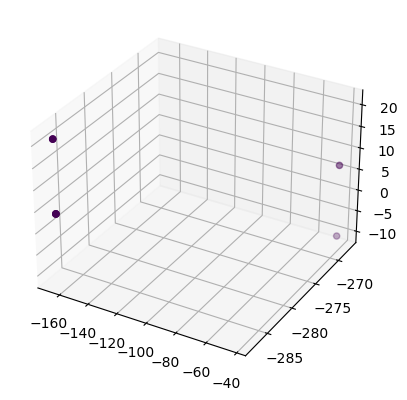

Number of clusters: 1


In [34]:
event = batch1[batch1.auxiliary==False].loc[393349]

raw_data = [id_to_xyz(sen) for sen in event.sensor_id]

import scipy.cluster.hierarchy as hcluster
threshhold = 150

clusters = hcluster.fclusterdata(raw_data,threshhold,criterion='distance')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

xs = [a[0] for a in raw_data]
ys = [a[1] for a in raw_data]
zs = [a[2] for a in raw_data]

ax.scatter(xs, ys, zs,
           c=clusters)

plt.show()

print("Number of clusters:", len(set(clusters)))